In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
uvvis_temp_control = pd.read_excel("../../Aug-2024/uvvis/troubleshoot_all_iters.xlsx", engine='openpyxl')
wavelength = uvvis_temp_control["Wavelength"].to_numpy()
well_names = uvvis_temp_control.columns[1:].to_numpy()

# since we don't have a water sample, take it from the last run
uvvis_data_redisperse = pd.read_excel("../../Aug-2024/uvvis/redisperse.xlsx", engine='openpyxl')
water = uvvis_data_redisperse.iloc[:,-1].to_numpy()

In [5]:
volumes = pd.read_csv('../../Aug-2024/misc/volumes_all_iters.csv')
times = pd.read_csv('../../Aug-2024/misc/times_all_iters.csv')
comps = np.vstack((volumes.to_numpy()[:,-1], times.to_numpy()[:,-1])).T

In [16]:
iter_zero_uvvis = uvvis_temp_control.iloc[:,1:25]
print("Taking data from wells : ", iter_zero_uvvis.columns)
iter_zero_comps = comps[:24,:]
print("Total compositions : ", iter_zero_comps.shape)
print("Total spectra : ", iter_zero_uvvis.shape)

Taking data from wells :  Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12'],
      dtype='object')
Total compositions :  (24, 2)
Total spectra :  (101, 24)


In [15]:
iter_zero_uvvis_nobkg = []
for _, spectra in iter_zero_uvvis.items():
    y = spectra-water
    iter_zero_uvvis_nobkg.append(y)
iter_zero_uvvis_nobkg = np.asarray(iter_zero_uvvis_nobkg)
print(iter_zero_uvvis_nobkg.shape)

(24, 101)


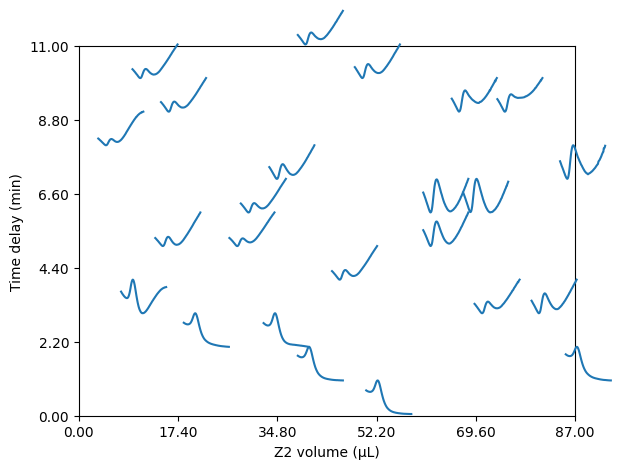

In [18]:
import sys 
sys.path.append("/Users/pozzolabadmin/Documents/codebase/experiments/peptide_phase_mapping")
from utils import plot_phasemap

bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T
fig, ax = plt.subplots()
plot_phasemap(bounds, ax, 
              iter_zero_comps, 
              iter_zero_uvvis_nobkg
              )
ax.set_xlabel('Z2 volume (µL)')
ax.set_ylabel('Time delay (min)') 
plt.show()

In [20]:
np.save("../data/comps_0.npy", iter_zero_comps)
np.save("../data/spectra_0.npy", iter_zero_uvvis_nobkg)
np.save("../data/wav.npy", wavelength)